In [33]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [34]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])

In [35]:
df_allmatch

,ID,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
0,6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
1,6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500,1500,0,0
2,6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500,1500,0,0
3,6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
4,6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
4586,20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
4587,20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7
4588,20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0


In [36]:
df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10011354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,20.0,6.8,0.0,494.8,17.8,11.8,2.0,6.8,23.4,12.2,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78
20340810,12.2,4.0,0.2,537.2,11.6,14.2,1.0,3.6,21.8,14.2,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62


In [37]:
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)

In [38]:
df_recent_stats.sort_index(inplace=True)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10010103,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10010908,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011007,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011229,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011354,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,11.2,3.4,0.0,471.8,15.4,10.4,2.4,3.0,24.6,9.2,...,19.0,2.4,2.2,0.0,0.2,64.0,24.4,115.2,16.08,54.30
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20343405,13.4,2.8,0.0,605.6,14.8,9.2,1.0,3.4,19.6,10.6,...,23.2,2.0,2.4,2.0,0.2,61.2,19.6,124.4,11.58,54.54


In [39]:
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

In [40]:
df_allmatch

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
ID,,,,,,,,,,,,,,,,
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,23607,1500,1500,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,17564,1500,1500,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,2,三協Ｆ柏,5137,1519,1682,6,-13
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7


In [41]:
df_allmatch

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
ID,,,,,,,,,,,,,,,,
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,23607,1500,1500,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,17564,1500,1500,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,2,三協Ｆ柏,5137,1519,1682,6,-13
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7


In [42]:
df = pd.concat([df_allmatch, df_recent_stats], axis=1)

In [43]:
df["Date"] = pd.to_datetime(df["Date"])

In [44]:
df = df.set_index("Date")

In [45]:
df.sort_index(inplace=True)

In [46]:
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,埼玉,...,18.8,1.6,1.8,1.0,0.0,46.4,13.8,123.8,11.02,53.80
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78


In [47]:
df_past=df['2016':'2018']

In [48]:
df_past.columns

Index(['Year', 'Sec', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF', 'AwayGF',
       'W/L', 'Stadium', 'Attendances', 'HomeElo', 'AwayElo', 'HomeED',
       'AwayED', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession'],
      dtype='object')

In [51]:
X_train=df_past[[ 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                 'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate','AwayPossession']].values

In [52]:
y_train = df_past["W/L"].values

In [53]:
df_future = df['2019']

In [54]:
X_test=df_future[[ 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                 'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate','AwayPossession']].values

In [55]:
y_test = df_future["W/L"].values

In [56]:
rf= RandomForestClassifier(max_depth=6)  
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_proba=rf.predict_proba(X_test)

In [57]:
rf.score(X_test,y_test)

0.4215686274509804

In [58]:
rf.feature_importances_

array([0.03107278, 0.03322703, 0.0041125 , 0.04264188, 0.02328189,
       0.0162335 , 0.01658111, 0.01689784, 0.02254816, 0.02618429,
       0.01757409, 0.02002845, 0.01757453, 0.02059247, 0.01420999,
       0.0030912 , 0.04850592, 0.03269459, 0.02049064, 0.02432869,
       0.02742447, 0.02388146, 0.03083674, 0.0086312 , 0.04860763,
       0.02272431, 0.01834909, 0.01775614, 0.02012861, 0.0207836 ,
       0.02143844, 0.02391527, 0.02921769, 0.02801689, 0.01882673,
       0.01542898, 0.00264548, 0.05049737, 0.01686798, 0.02263629,
       0.03341636, 0.0460977 ])

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=1234)
X_embedded = tsne.fit_transform(X_train)

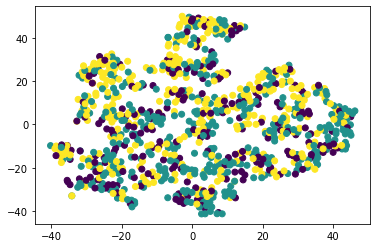

In [60]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train)

In [61]:
len(rf.feature_importances_)

42

In [62]:
left = range(42)
height=rf.feature_importances_

label = ['HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession']

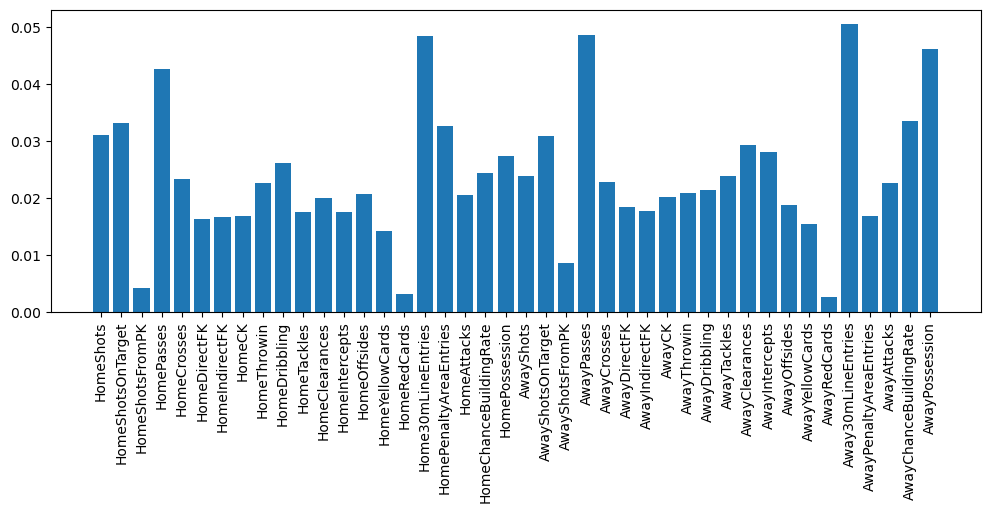

In [63]:
plt.figure(figsize=(12, 4), dpi=100)
plt.xticks(rotation=90)
plt.bar(left, height,tick_label=label, align="center")
plt.show()

In [64]:
np.sort(rf.feature_importances_)

array([0.00264548, 0.0030912 , 0.0041125 , 0.0086312 , 0.01420999,
       0.01542898, 0.0162335 , 0.01658111, 0.01686798, 0.01689784,
       0.01757409, 0.01757453, 0.01775614, 0.01834909, 0.01882673,
       0.02002845, 0.02012861, 0.02049064, 0.02059247, 0.0207836 ,
       0.02143844, 0.02254816, 0.02263629, 0.02272431, 0.02328189,
       0.02388146, 0.02391527, 0.02432869, 0.02618429, 0.02742447,
       0.02801689, 0.02921769, 0.03083674, 0.03107278, 0.03269459,
       0.03322703, 0.03341636, 0.04264188, 0.0460977 , 0.04850592,
       0.04860763, 0.05049737])

---

In [81]:
accuracies = []
feature_imp_sum = np.zeros(40)

df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)
df_recent_stats.sort_index(inplace=True)

df = pd.concat([df_allmatch[["W/L","Date"]],df_recent_stats], axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.sort_index(inplace=True)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[[ 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[[ 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_test = df_future["W/L"].values


        rf= RandomForestClassifier(max_depth=5)  
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        y_pred_proba=rf.predict_proba(X_test)

        accuracy = rf.score(X_test,y_test) 
        accuracies.append(accuracy)
        
        feature_imp_sum = feature_imp_sum + rf.feature_importances_
        
print(f"的中率の平均値 : {np.mean(accuracies):.3f}")

的中率の平均値 : 0.447


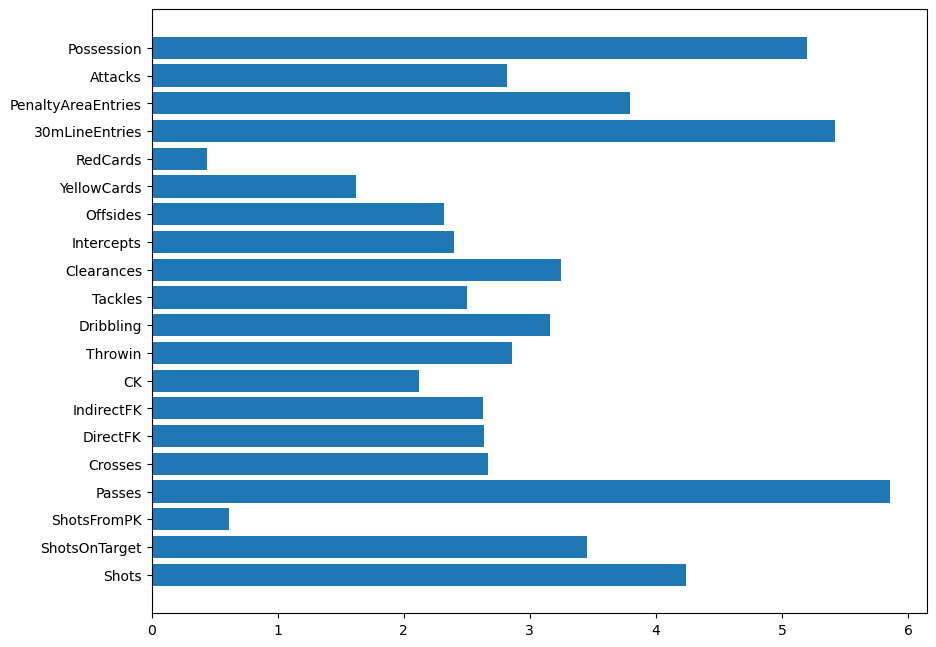

In [82]:
feature_imp_sum = feature_imp_sum[:20]+feature_imp_sum[20:]
left = range(20)
height=feature_imp_sum

label = ['Shots', 'ShotsOnTarget', 'ShotsFromPK','Passes', 'Crosses', 'DirectFK', 'IndirectFK', 'CK','Throwin', 'Dribbling', 'Tackles', 'Clearances',
       'Intercepts', 'Offsides', 'YellowCards', 'RedCards','30mLineEntries', 'PenaltyAreaEntries', 'Attacks', 'Possession']

plt.figure(figsize=(10, 8), dpi=100)
plt.barh(left, height,tick_label=label, align="center")
plt.show()

### 考察

以外にも過去5試合のスタッツだけでレーティングとほぼ同等の精度が出た｡ また､パス数､30m進入回数､ボール支配率あたりが重要度の高い特徴量になっている｡
これをレーティングと合わせて学習させたらどうなるか

### 今までのレーティングとレーティング差分を含めた値で検証

In [92]:
accuracies = []
calibrations = []
feature_imp_sum = np.zeros(44)

df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)
df_recent_stats.sort_index(inplace=True)

df = pd.concat([df_allmatch ,df_recent_stats], axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.sort_index(inplace=True)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[[ 'HomeElo','HomeED','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayElo','AwayED','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[[ 'HomeElo','HomeED', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayElo','AwayED','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_test = df_future["W/L"].values


        rf= RandomForestClassifier(max_depth=5)  
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        y_pred_proba=rf.predict_proba(X_test)

        accuracy = rf.score(X_test,y_test) 
        accuracies.append(accuracy)
        
        feature_imp_sum = feature_imp_sum + rf.feature_importances_
        
        
        count=0

        pred_winrate_sum=0 # 予測勝率の和
        actual_win_sum=0 # 実勝利数の和

        pred_drawrate_sum=0 # 予測引き分け率の和
        actual_draw_sum=0 # 実引き分け数の和

        pred_lossrate_sum=0 # 予測敗率の和
        actual_loss_sum=0 # 実敗北数の和

        for index,row in df_future.iterrows():
            # ホームが実力上位
            if row["HomeElo"] > row["AwayElo"]: 
                pred_winrate_sum += y_pred_proba[count][1] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][2]

                if y_test[count] == 1: 
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            # アウェイが実力上位
            elif row["AwayElo"] > row["HomeElo"]: 
                pred_winrate_sum += y_pred_proba[count][2] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][1]

                if y_test[count] == 2:
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            count+= 1

        
        calibration = pred_winrate_sum/actual_win_sum
        calibrations.append(calibration)

print(f"的中率の平均値 : {np.mean(accuracies):.3f}  較正値の平均値 : {np.mean(calibrations):.3f}")

的中率の平均値 : 0.464  較正値の平均値 : 0.931


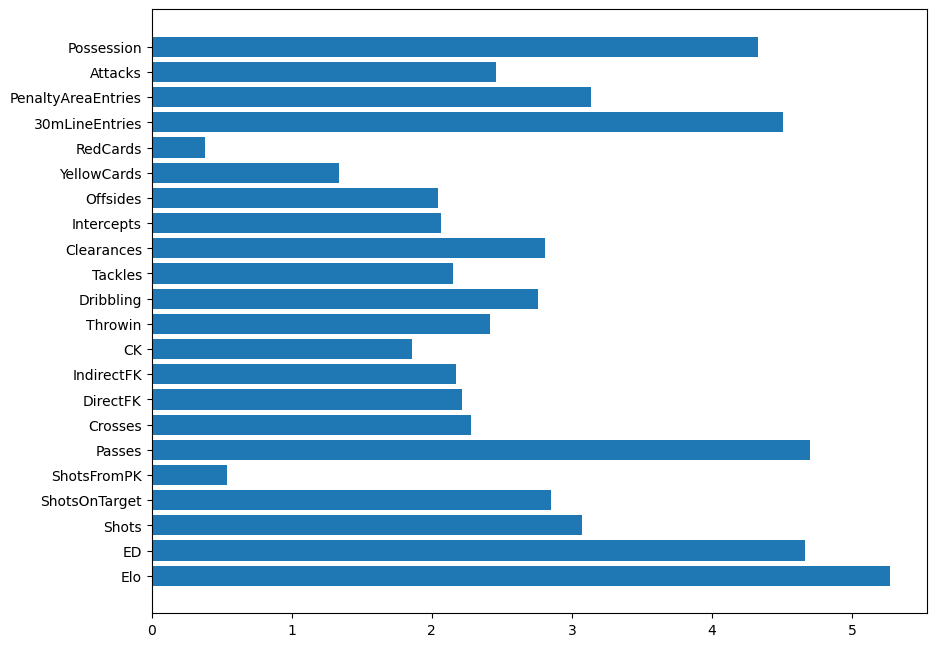

In [93]:
feature_imp_sum = feature_imp_sum[:22]+feature_imp_sum[22:]
left = range(22)
height=feature_imp_sum

label = ['Elo','ED','Shots', 'ShotsOnTarget', 'ShotsFromPK','Passes', 'Crosses', 'DirectFK', 'IndirectFK', 'CK','Throwin', 'Dribbling', 'Tackles', 'Clearances',
       'Intercepts', 'Offsides', 'YellowCards', 'RedCards','30mLineEntries', 'PenaltyAreaEntries', 'Attacks', 'Possession']

plt.figure(figsize=(10, 8), dpi=100)
plt.barh(left, height,tick_label=label, align="center")
plt.show()

In [94]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=1234)
X_embedded = tsne.fit_transform(X_train)

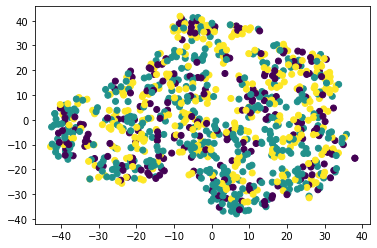

In [95]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train)

### 検証

レーティングも加えて検証したところ､レーティングは重要度としては高い｡がしかし､ぶっちゃけ精度は微増した程度｡
レーティングしか加えなかったときの予測精度とほぼ変わらない｡｡
単純に過去の数字持ってきて､食べさせて､だけでは精度が上がらない感じはする